## Solução Numérica da Equação do Calor Unidimensional

### Utilizando o método de Crank-Nicolson para um problema de condução de calor unidimensional em regime transiente


$\begin{equation}
\large
T^{k+1}_{i} = \Delta t \cdot \alpha \left(\frac{ \left ( T^{k+1}_{i+1} - 2T^{k+1}_{i} + T^{k+1}_{i-1} \right) + \left ( T^{k}_{i+1} - 2T^{k}_{i} + T^{k}_{i-1}\right)}{2 \cdot \Delta x^2} \right) + T^{k}_{i}
\end{equation}$

$\begin{equation}
\therefore
\end{equation}$

$\begin{equation}
\large
-r \cdot T^{k+1}_{i+1} + (1 + 2r)\cdot  T^{k+1}_{i} - r \cdot T^{k+1}_{i-1} = r \cdot T^{k}_{i+1} + (1 - 2r)\cdot  T^{k}_{i} + r \cdot T^{k}_{i-1}
\end{equation}$

onde

$\begin{equation}
\large
r = \frac{\alpha \Delta t}{2 \Delta x^2}
\end{equation}$

### Determine a distribuição de temperaturas em uma barra de metal $\alpha = $ 1.0 cm^2/s de comprimento $L = \pi$ cm mantida a 0°C em seus extremos a partir de uma distribuição inicial triangular de temperaturas:


\begin{equation*}
T(x,0) = f(x) = \left\{
        \begin{array}{ll}
            x & \quad  0 <  x < \frac{L}{2} \\
            L-x & \quad \frac{L}{2} < x < L
        \end{array}
    \right.
\end{equation*}



In [1]:
# Carregamento de pacotes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
# Parâmetros do problema
L = np.pi #cm
tf = 100. #s , tempo da simulação
alfa = 1.0 #cm^2/s


In [3]:
# Parâmetros do algoritmo
np_x = 1001 # Numero de pontos do grid na direção x
np_t = 2001 # Numero de pontos do grid na dimensão de tempo t
#Criação de estruturas (Arrays) para solução
p_x, delta_x = np.linspace( 0, L , np_x, retstep = True)
p_t, delta_t = np.linspace( 0, tf , np_t, retstep = True)
r = (alfa*delta_t) / (2*delta_x**2)

In [4]:
# Função para resolver as equações
def calcula(T, method = 'Inversion'):
    from linthom import linthom
    if method == "Inversion":
    #Resolve o sistema de equacoes por inversao matricial direta
        A = -1.*np.diag(r*np.ones(len(p_x)-3),-1) + 1.*np.diag((1+2*r)*np.ones(len(p_x)-2),0)  -1.*np.diag(r*np.ones(len(p_x)-3),1) #Criacao da matriz A somando as diagonais de cada matriz 
        for k in range(0,np_t-1):
            b = np.zeros((np_x-2,))
            for j in range(0,np_x-2):
                b[j] = r*T[k,j+1] + (1-2*r)*T[k,j] + r*T[k,j-1]
                
            Tk = np.linalg.solve(A,b) #Resolve a divisao de b por A
            T[k+1,1:-1] = Tk
    elif method == "Thomas":
    #Resolução do sistema de equacoes pelo método de Thomas #Implementar mais duas linhas para fazer para 10 pontos no trabalho   
        linthom()  
        print("Por enquanto nada")
    return T

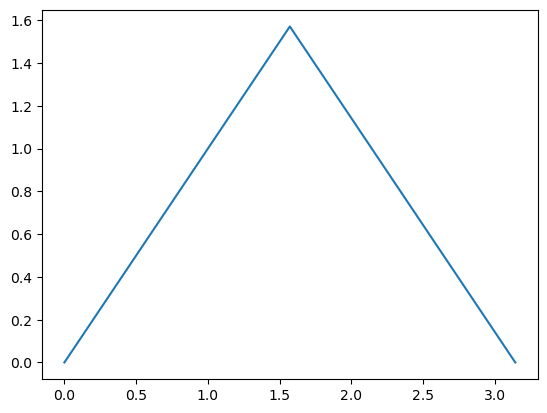

In [5]:
# Inicialização da matriz de temperaturas: T(k, i)
T = np.zeros((np_t,len(p_x)))
#Criando a linha com a temperatura inicial 
Ti = 100. #°C
Ti = [p_x[i] if p_x[i] < L/2 else L-p_x[i] for i in range(0,len(p_x))] #criou o T(x,0)

#Condicoes de contorno (temperatura fixada):
T_x0 = 0. #°C
T_xL = 0. #°C

#Setando as condições iniciais na matriz de soluções:
T[0,:] = Ti

#Setando as condições de contorno:
T[1:,0] = T_x0
T[1:,-1] = T_xL

plt.plot(p_x,Ti)


In [6]:
# Função para plotar o mapa de calor
def plotheatprofile(T_k, k):
  # Clear the current plot figure
  plt.clf()
  plt.title(f"Temperatura em t = {p_t[k]:.3f} s")
  plt.xlabel("x [cm]")
  plt.ylabel("T [°C]")
  plt.axis([0, L, 0, L/2])
  
  # Plot de T_k (T no passo de tempo k)
  plt.plot(p_x, T_k)
    
  return plt

In [7]:
# Do the calculation here
T = calcula(T)

# Animação \0/
def animate(k):
  plotheatprofile(T[k,:], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=int(tf), repeat=True)
anim.save("figura_teste.gif")

KeyboardInterrupt: 

In [ ]:
# Comparando agora com a solução analítica:
# Inicialização da matriz de temperaturas: T(k, i)
Ta = 

# Set the initial condition
Ta[0,:] = 

# Set the boundary conditions
Ta[1:, 0] = 
Ta[1:, -1] = 

N = 20; # Número de termos da série de Fourier
...

# Animação \0/
def animate(k):
  plotheatprofile(Ta[k,:], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=tf, repeat=True)
anim.save("solucao_equacao_do_calor_analitica.gif")

SyntaxError: invalid syntax (2779274415.py, line 3)